# Retail Price Optimization

### Life cycle of Machine learning Project
<ul>
    <li>Understanding the Problem Statement</li>
    <li>Data Collection</li>
    <li>Data Checks to perform</li>
    <li>Exploratory data analysis</li>
    <li>Data Pre-Processing</li>
    <li>Model Training</li>
    <li>Choose best model</li>
</ul>

## 1) Problem statement
    
<ul>
        <li>This project understands how the supermarket is affected by other variables such as the day of the week, the total amount spent on transactions, or to analyze the factors that influence customer spending patterns
        </li>
</ul>

## 2) Data Collection

   <ul>
        <li>Dataset Source -<a>https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales</a></li>
        <li> The data consists of 17 column and 1000 rows.</li>
   </ul>

## 2.1 Import Data and Required Packages
### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# import essential package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame and Show Top 5 Records

In [3]:
df = pd.read_csv('data/supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Shape of dataset

In [4]:
df.shape

(1000, 17)

## 2.2 Dataset information

| Column Name              | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| Invoice id               | Computer-generated sales slip invoice identification number                |
| Branch                   | Branch of supercenter (identified by A, B, and C)                            |
| City                     | Location of supercenters                                                    |
| Customer type            | Type of customers, recorded by Members for customers using a member card, and Normal for those without a member card |
| Gender                   | Gender type of the customer                                                  |
| Product line             | General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel |
| Unit price               | Price of each product in USD                                                 |
| Quantity                 | Number of products purchased by the customer                                  |
| Tax                      | 5% tax fee for customers buying products                                      |
| Total                    | Total price including tax                                                    |
| Date                     | Date of purchase (Record available from January 2019 to March 2019)          |
| Time                     | Purchase time (10am to 9pm)                                                   |
| Payment                  | Payment method used by the customer for purchase (Cash, Credit card, and Ewallet) |
| COGS (Cost of goods sold)| The cost of the goods sold                                                   |
| Gross margin percentage  | Gross margin percentage                                                       |
| Gross income             | Gross income                                                                  |
| Rating                   | Customer stratification rating on their overall shopping experience (On a scale of 1 to 10) |


## 3) Data Checks to perform

<ul>
    <li>Check Missing values</li>
    <li>Check Duplicates</li>
    <li>Check data type</li>
    <li>Check the number of unique values of each column</li>
    <li>Check statistics of data set</li>
    <li>Check various categories present in the different categorical column</li>
</ul>

## 3.1 Check Missing values

In [5]:
# checking for missing values
missing_values = df.isnull().sum()

missing_values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Check Duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicates values in the data set

## 3.3 Check data types

In [7]:
df.info() #let's check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## 3.4 Checking the number of unique values of each column

In [8]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [9]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

## Check statistics of data set

In [10]:
df.describe() #check statistical summary

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


### Insight
   
<ul>
    <ul>
  <li>The mean unit price of $55.67 suggests that the products being sold are relatively expensive.</li>
        
  <li>The mean quantity is 5.51 units, indicating that customers tend to purchase multiple unit in a single transaction.</li>
  <li>The mean tax added to the cost is $15.38, which is about 28% of the mean unit price. This suggests that the products being sold are subject to a moderate amount of tax.</li>
        
  <li>The mean total cost of the transaction is $322.97, which is much higher than the mean unit price due to the tax being added</li>
        
  <li>The mean gross margin percentage of 4.76% suggests that the business is operating with relatively low profit margin.</li>
  <li>The mean gross income per transaction is $15.38, which is not a significant amount of profit.</li>
  <li>The minimum rating of 4 and maximum rating of 10 suggest that the quality of the products or the service provided to customers varies widely.</li>
    </ul>
</ul>



## 3.7 Exploring Data

In [11]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
print("Categories in 'City' variable: ",end=" " )
print(df['City'].unique())

print("Categories in 'Customer type' variable: ",end=" ")
print(df['Customer type'].unique())

print("Categories in 'Gender' variable: ",end=" ")
print(df['Gender'].unique())

print("Categories in 'Product line' variable: ",end=" ")
print(df['Product line'].unique())

print("Categories in 'Payment' varible: ",end="")
print(df['Payment'].unique())

Categories in 'City' variable:  ['Yangon' 'Naypyitaw' 'Mandalay']
Categories in 'Customer type' variable:  ['Member' 'Normal']
Categories in 'Gender' variable:  ['Female' 'Male']
Categories in 'Product line' variable:  ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Categories in 'Payment' varible: ['Ewallet' 'Cash' 'Credit card']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

# print columns
print('We have {} numerical feature : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} caegorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical feature : ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

We have 9 caegorical features : ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


## 4) Exploring Data (Visualization)

### What is the average total amount spent by each customer type and gender?

In [14]:
# spliting the customer type and to check average total amount spent by each customer type
df_customer_type = df.groupby('Customer type')['Total'].mean()
print(df_customer_type)

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64


<AxesSubplot:title={'center':'Average Total Amount spent by each customer type'}, xlabel='Customer type'>

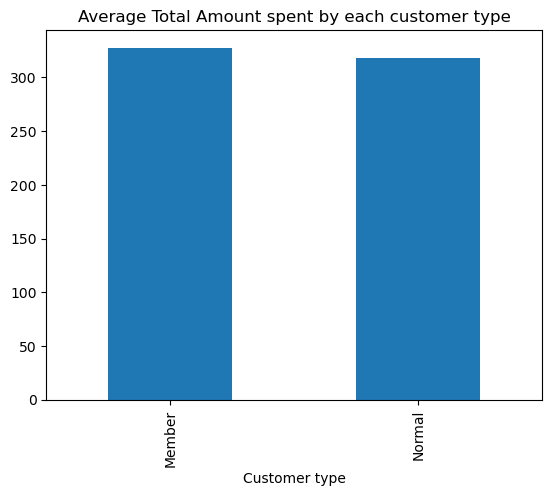

In [15]:
# visualize by bar plot
df_customer_type.plot(kind='bar', title = 'Average Total Amount spent by each customer type')

### The total sales for each customer gender and product line combination

<AxesSubplot:xlabel='Product line', ylabel='Total'>

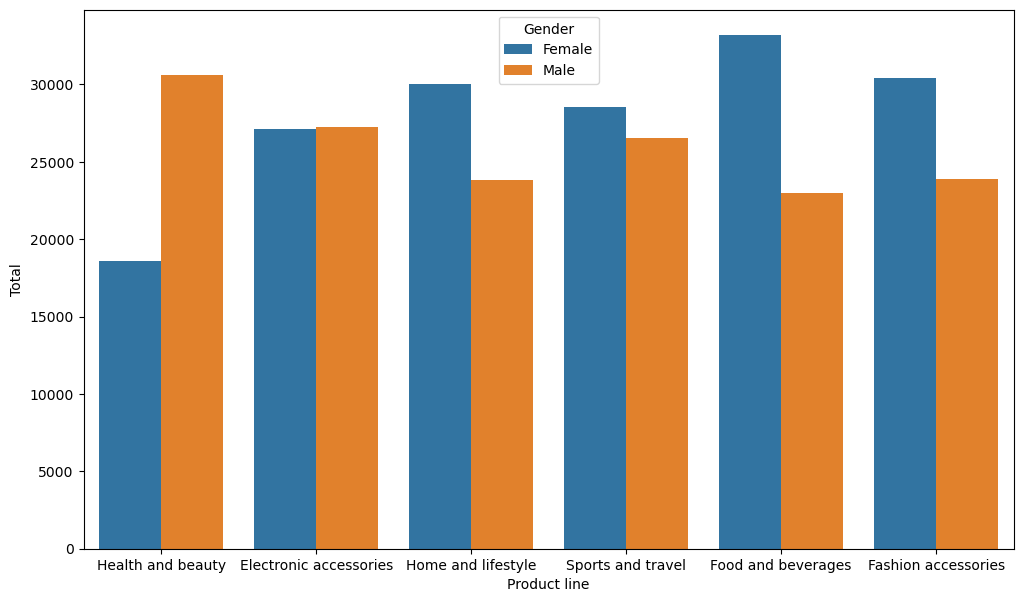

In [16]:
#to visualize total sales each customer gender and product line
plt.figure(figsize=(12,7))
sns.barplot(x='Product line', y='Total', hue='Gender', data=df, estimator = sum, ci=None)

In [17]:
# group the data by gender and product line and calculate the total sales for each group

customer_gender_pd_line = df.groupby(['Gender','Product line'])['Total'].sum()
print(customer_gender_pd_line)

Gender  Product line          
Female  Electronic accessories    27102.0225
        Fashion accessories       30437.4000
        Food and beverages        33170.9175
        Health and beauty         18560.9865
        Home and lifestyle        30036.8775
        Sports and travel         28574.7210
Male    Electronic accessories    27235.5090
        Fashion accessories       23868.4950
        Food and beverages        22973.9265
        Health and beauty         30632.7525
        Home and lifestyle        23825.0355
        Sports and travel         26548.1055
Name: Total, dtype: float64


<AxesSubplot:title={'center':'Total sales for each Group of Gender and Product line'}, xlabel='Gender,Product line'>

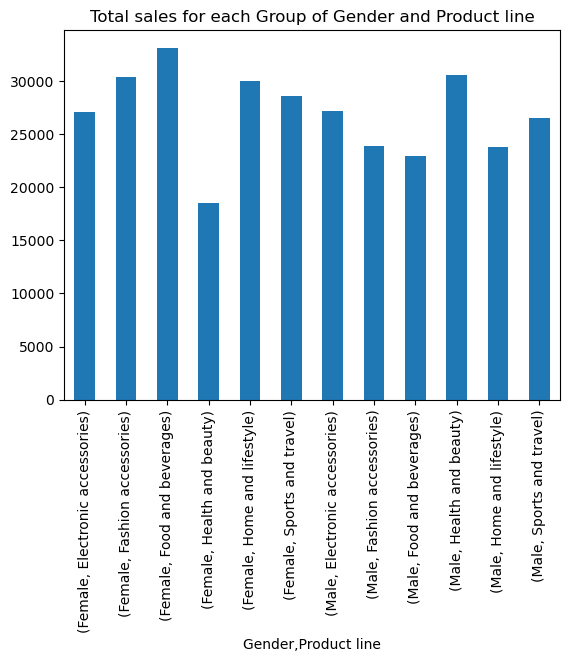

In [18]:
# to visualize the data by gender and product line and calculate the total sales for each group
customer_gender_pd_line.plot(kind='bar', title='Total sales for each Group of Gender and Product line')

we can observe that the product line with the highest sales figures for females is "Food and Beverages," while for males, it is "Health and Beauty." We can also see that the product line with the lowest sales figures for females is "Health and Beauty," while for males, it is "Food and Beverages.

### The average unit price for each product line

In [19]:
# To group unit price for each product line
df_product_line_price = df.groupby('Product line') ['Unit price'].mean()
print(df_product_line_price)

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64


<AxesSubplot:title={'center':'Average Unit Price of Each Product Line'}, xlabel='Product line'>

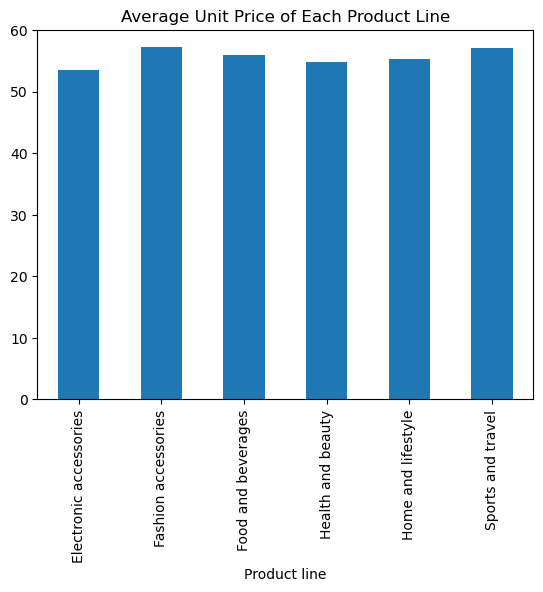

In [20]:
# To visualize average unit pice of each product line
df_product_line_price.plot(kind='bar', title='Average Unit Price of Each Product Line')

### To calculate the overall gross margin percentage

In [21]:
# calculate the overall gross margin percentage
df['gross_margin'] = (df['Total']-df['cogs']) / df['Total']
overall_gross_margin = df['gross_margin'].mean()

print(overall_gross_margin)

0.047619047619048616


An indication of low profitability for the Supermarket is reflected by a gross margin of 0.047, which implies that only 4.76% of the total revenue is available after factoring in the COGS. To enhance profitability, the business can aim to decrease the COGS or boost revenue.

### Which cities are the biggest customers?

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64


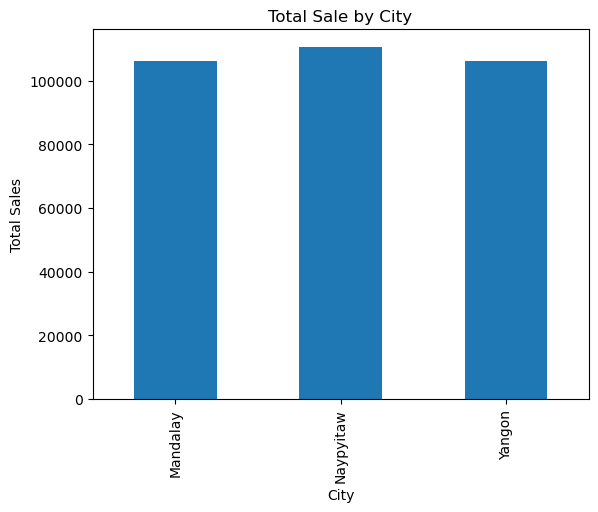

In [22]:
df_city_sales = df.groupby('City')['Total'].sum()
print(df_city_sales)

# to visualize by bar chart
df_city_sales.plot(kind='bar')

# add title and lanels to the plot
plt.title('Total Sale by City')
plt.xlabel('City')
plt.ylabel('Total Sales')

plt.show()

### The relationship between the unit price and the quantity of each product

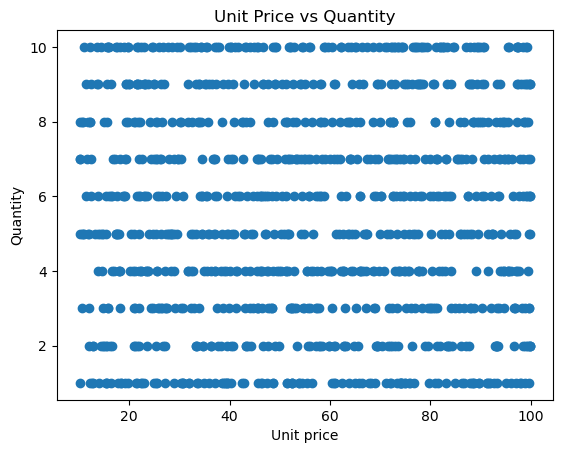

,Unit price,Quantity
Unit price,1.000000,0.010778
Quantity,0.010778,1.000000


In [23]:
# create a scatter plot to visualize the relationship between unit price and quantity
plt.scatter(df['Unit price'], df['Quantity'])

# add title and lanels to the plot
plt.title('Unit Price vs Quantity')
plt.xlabel('Unit price')
plt.ylabel('Quantity')

plt.show()

df[["Unit price", "Quantity"]].corr()

The correlation between "Quantity" and "Unit price". It indicates a weak positive correlation, which means that as the quantity of a product increases, the unit price tends to increase slightly as well. However, the correlation is very weak.

### The overall satisfaction level of customers with the supermarket.

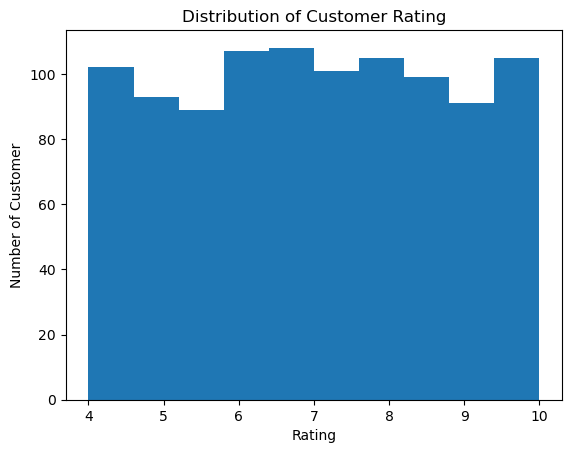

In [24]:
# create a histogram to visualize the distribution of customer rating
df['Rating'].plot(kind='hist')

# add title and lanels to the plot
plt.title('Distribution of Customer Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Customer')

plt.show()


In [25]:
# try to bin Rating data
bins= np.linspace(min(df["Rating"]), max(df["Rating"]), 4)

# set group names
group_names = ['Low', 'Medium', 'High']

df['rating_bined'] = pd.cut(df['Rating'], bins, labels=group_names, include_lowest=True)
df[['Rating', 'rating_bined']].head(20)

,Rating,rating_bined
0,9.1,High
1,9.6,High
2,7.4,Medium
3,8.4,High
4,5.3,Low
5,4.1,Low
6,5.8,Low
7,8.0,Medium
8,7.2,Medium
9,5.9,Low


In [26]:
df['rating_bined'].value_counts()  #Let see the number of ratings in each bin

Medium    351
Low       341
High      308
Name: rating_bined, dtype: int64

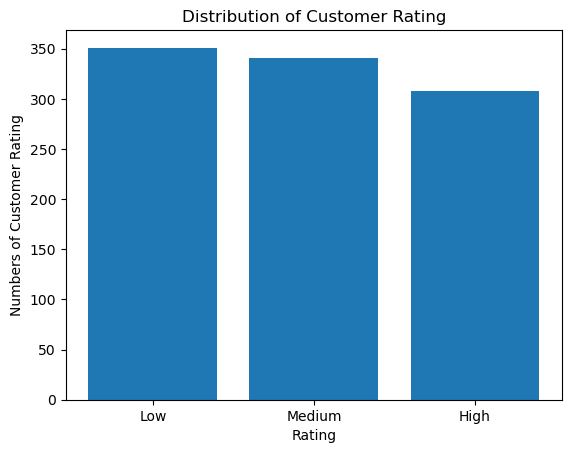

In [27]:
# To visualize rating of each bins
plt.bar(group_names, df["rating_bined"].value_counts())

# add title and lanels to the plot
plt.title('Distribution of Customer Rating')
plt.xlabel('Rating')
plt.ylabel('Numbers of Customer Rating')

plt.show()

### Which branches are performing well in term of gross of margin percentage?

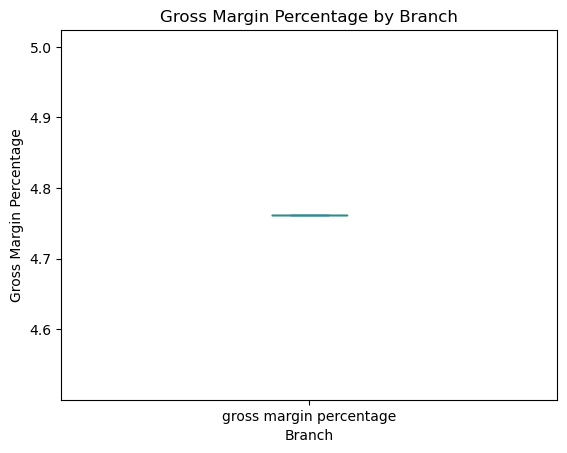

In [28]:
# group the data by brach and calculate the average gross margin percentage of each branch
df_branch_margin = df.groupby('Branch')['gross margin percentage'].mean()

# visualize the average gross margin for each branch
df_branch_margin.plot(kind='box')

# add title and lanels to the plot
plt.title('Gross Margin Percentage by Branch')
plt.xlabel('Branch')
plt.ylabel('Gross Margin Percentage')

# show the plot
plt.show()

### The most popular product line in the supermarket

Most popular product lines:
Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64


<AxesSubplot:title={'center':'The Most Popular Product Lines'}, xlabel='Product line'>

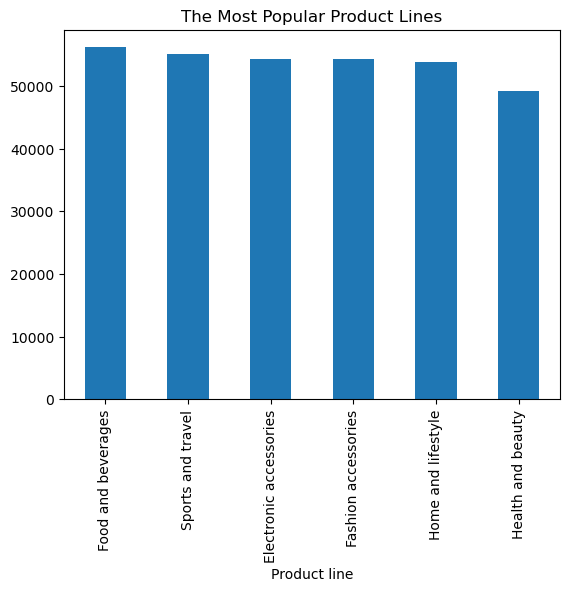

In [29]:
# group the data by product line and calculate total sale of each product lines
product_line_sales = df.groupby('Product line')['Total'].sum()
product_line_sales = product_line_sales.sort_values(ascending=False)

#print the total sales of each product line
print("Most popular product lines:")
print(product_line_sales)

#visulize the total sales for each product lines with bar chart
product_line_sales.head(10).plot(kind='bar', title='The Most Popular Product Lines')

### The most profitable product line in the supermarket

The most profitable product line :
Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64


<AxesSubplot:title={'center':'The most profitable product in the supermarket'}, xlabel='Product line'>

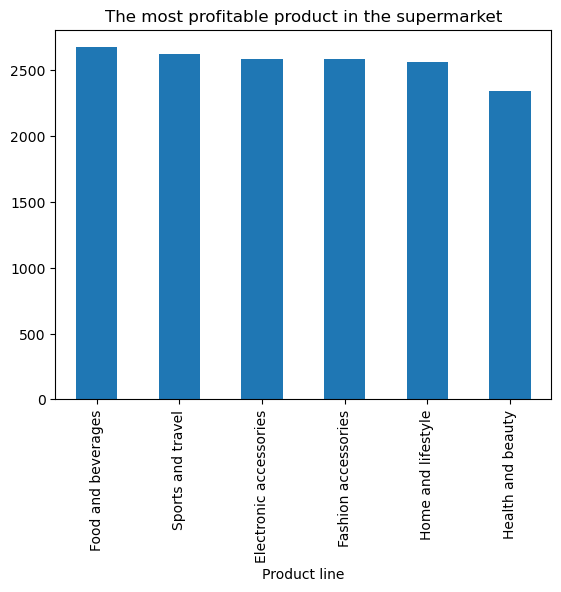

In [30]:
# group the data by product line and calculate the total gross income for each product line
product_line_profit = df.groupby('Product line')['gross income'].sum()

# sort the product lines by total gross income in descending order
product_line_profit = product_line_profit.sort_values(ascending=False)

# print the top 10 most profitable product lines
print('The most profitable product line :')
print(product_line_profit)

# visualize the most profitable product lines
product_line_profit.head(10).plot(kind='bar', title='The most profitable product in the supermarket')

### The most popular payment method in the supermarket

The most payment method in the supermarket :
Payment
Cash           112206.570
Ewallet        109993.107
Credit card    100767.072
Name: Total, dtype: float64


<AxesSubplot:title={'center':'The Most Popular Payment Method'}, xlabel='Payment'>

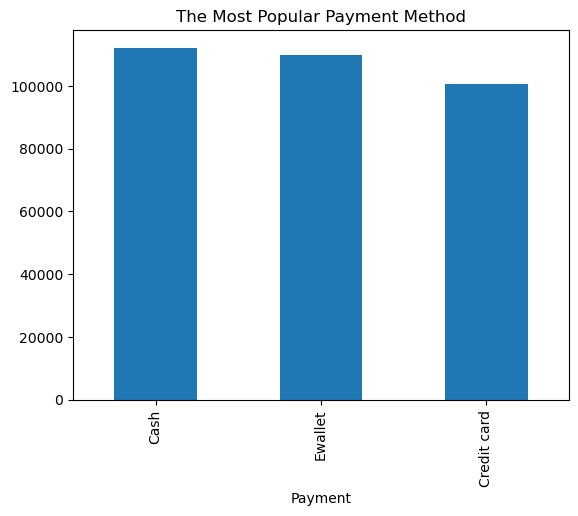

In [31]:
# group the data by payment method and calculate the total sales for each payment method
payment_method = df.groupby('Payment')['Total'].sum()

# sort the payment methods by total sales in descending order
payment_method = payment_method.sort_values(ascending=False)

# print the most popular payment method
print("The most payment method in the supermarket :")
print(payment_method.head(10))

# visualize the most popular payment methods
payment_method.plot(kind='bar', title='The Most Popular Payment Method')

<AxesSubplot:xlabel='Payment', ylabel='Total'>

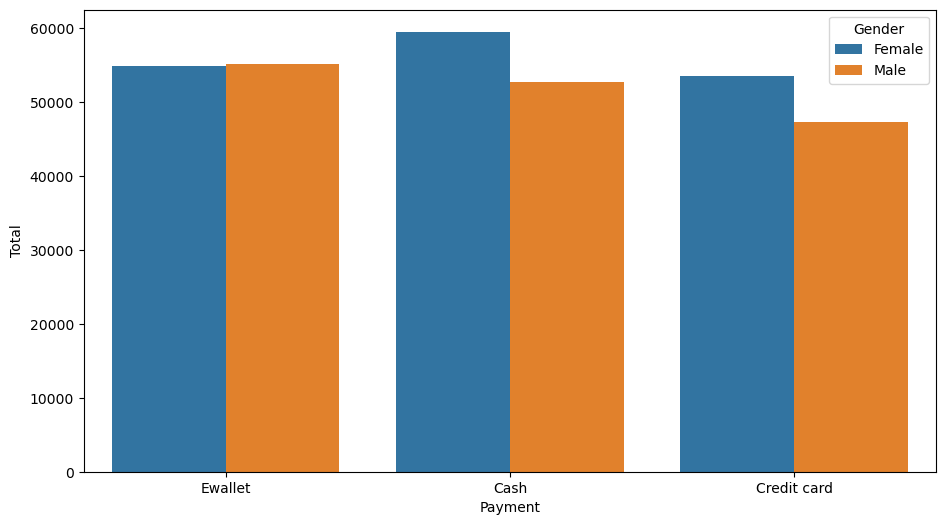

In [32]:
# total sales for each customer type by payment method

plt.figure(figsize=(11,6))
sns.barplot(x='Payment', y='Total', hue='Gender', data=df, ci=None, estimator=sum)

<AxesSubplot:xlabel='Payment', ylabel='Total'>

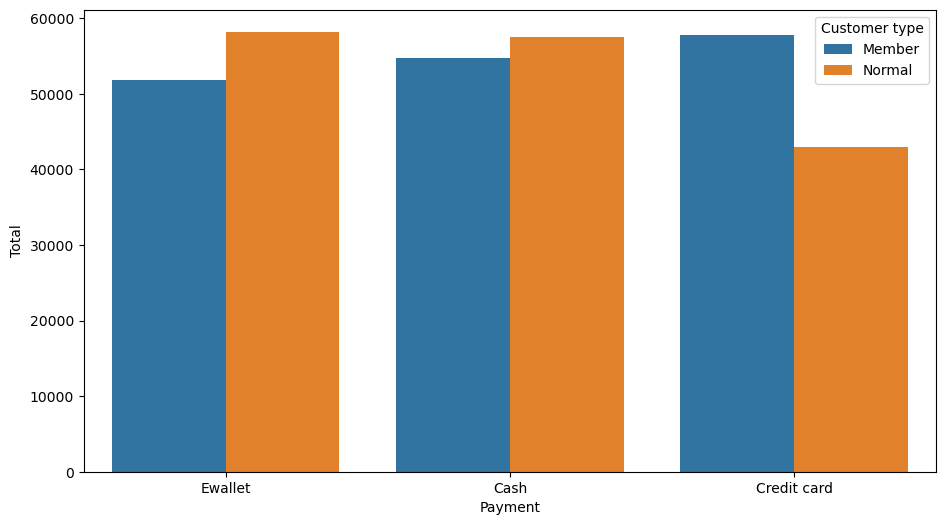

In [33]:
# toral sale for each customer type by payment method
plt.figure(figsize=(11,6))
sns.barplot(x='Payment', y='Total', hue='Customer type', data= df, ci = None , estimator=sum)

### The average unit prices and quantities sold for each product line

                        Unit price  Quantity
Product line                                
Electronic accessories   53.551588  5.711765
Fashion accessories      57.153652  5.067416
Food and beverages       56.008851  5.471264
Health and beauty        54.854474  5.618421
Home and lifestyle       55.316937  5.693750
Sports and travel        56.993253  5.542169


<AxesSubplot:title={'center':'Average Unit Prices and Quantities Sold for Each Product Line'}, xlabel='Product line'>

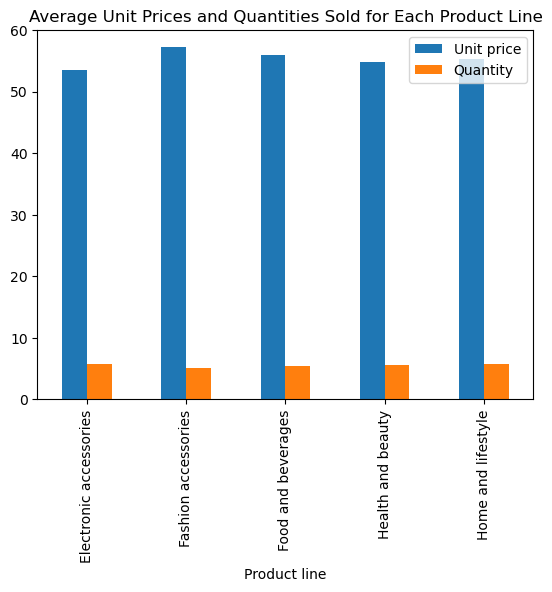

In [34]:
# group the data by product line and calculate average unit price and quantities of each product line
product_line_data = df.groupby('Product line')['Unit price', 'Quantity'].mean()

# print the average unit prices and quantities sold for each product line
print(product_line_data)

# visualize the average unit prices and quantities sold for each product line with bar chart
product_line_data.head().plot(kind='bar', title='Average Unit Prices and Quantities Sold for Each Product Line')

<AxesSubplot:title={'center':'Average Unit Price of each Product Line'}, xlabel='Product line'>

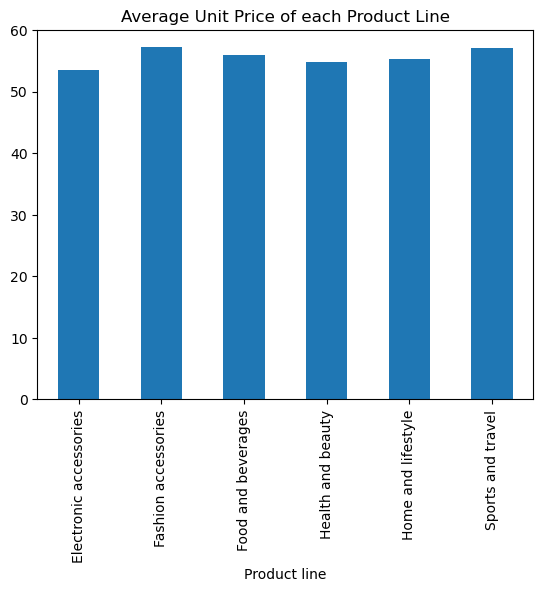

In [35]:
#visualize average unit prices for each product line
product_line_data['Unit price'].plot(kind='bar', title='Average Unit Price of each Product Line')

<AxesSubplot:title={'center':'Average of Quantity per product line'}, xlabel='Product line'>

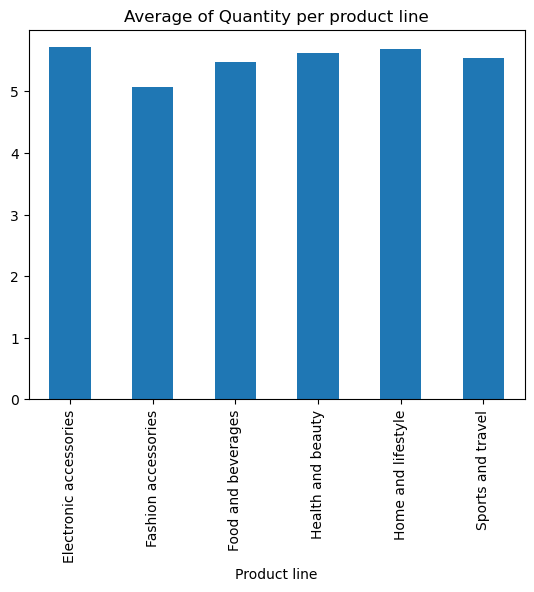

In [36]:
# visualize average quantity for each product line
product_line_data['Quantity'].plot(kind='bar', title='Average of Quantity per product line')

### The average gross margin anfd gross income for each product line

In [37]:
# group the data by product line and calculate average gross margin percentage and gross income for each product line
product_line_data2 = df.groupby('Product line')['gross margin percentage', 'gross income'].mean()

# print the average gross margin anfd gross income for each product line
print(product_line_data2)

                        gross margin percentage  gross income
Product line                                                 
Electronic accessories                 4.761905     15.220597
Fashion accessories                    4.761905     14.528062
Food and beverages                     4.761905     15.365310
Health and beauty                      4.761905     15.411572
Home and lifestyle                     4.761905     16.030331
Sports and travel                      4.761905     15.812630


<AxesSubplot:title={'center':'Average of Gross Margin and Gross Income for Each Product Line'}, xlabel='Product line'>

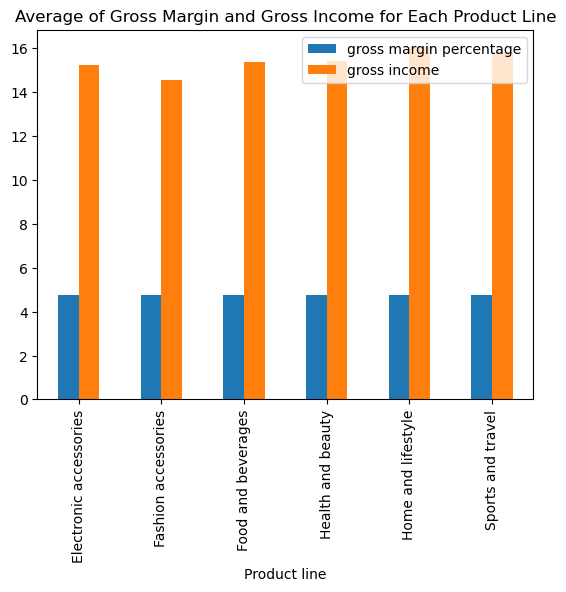

In [38]:
# visualize the average gross margin anfd gross income for each product line
product_line_data2.head(10).plot(kind='bar', title='Average of Gross Margin and Gross Income for Each Product Line')

### The average custome ratings for each product line

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


<AxesSubplot:title={'center':'Average Customer Rating foe Each Product Line'}, xlabel='Product line'>

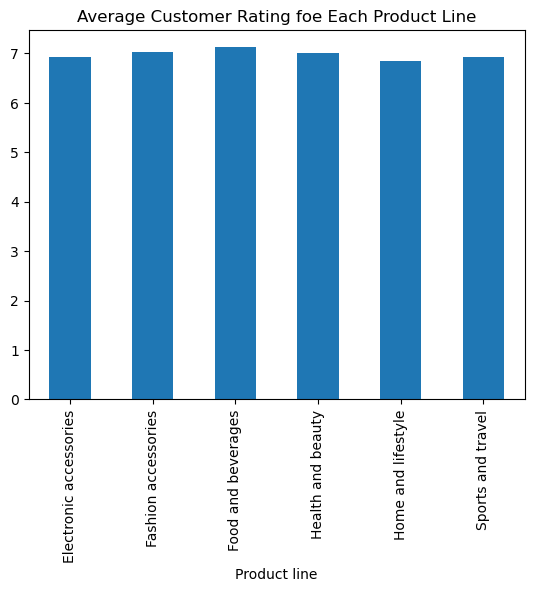

In [39]:
# group the data by product line and calculate average rating of each product line
product_line_data3 = df.groupby('Product line')['Rating'].mean()

# print the average custome ratings for each product line
print(product_line_data3)

# visualize the average custome ratings for each product line
product_line_data3.plot(kind='bar', title='Average Customer Rating foe Each Product Line')

### The most popular branches of the supermarket in terms of sales and customer ratings?

most popular branches :
              Total              Rating          
                sum        mean     sum      mean
Branch                                           
C       110568.7065  337.099715  2319.9  7.072866
A       106200.3705  312.354031  2389.2  7.027059
B       106197.6720  319.872506  2263.6  6.818072


<AxesSubplot:title={'center':'Most Popular Branch in Sales and Customer Ratings'}, xlabel='Branch'>

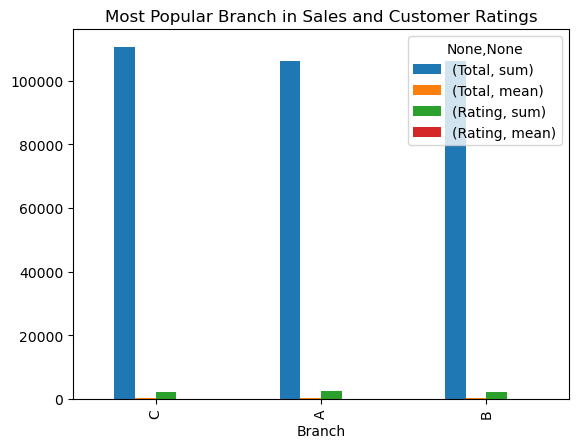

In [40]:
# group the data by branch and calculate the total sales and average customer rating for each branch
branch_data = df.groupby('Branch')['Total', 'Rating'].agg(['sum', 'mean'])

# sort the branches by total sales in descending order
branch_data = branch_data.sort_values(('Total', 'sum'), ascending=False)

# print the most popular branches of the supermarket in terms of sales and customer rating
print("most popular branches :")
print(branch_data)

# visualize the most popular branches of the supermarket in terms of sales and customer rating
branch_data.head(10).plot(kind='bar', title='Most Popular Branch in Sales and Customer Ratings')

### The most popular cities for the supermarket in terms of sales and customer ratings

Most popular cities for the supermarket
                 Total              Rating          
                   sum        mean     sum      mean
City                                                
Naypyitaw  110568.7065  337.099715  2319.9  7.072866
Yangon     106200.3705  312.354031  2389.2  7.027059
Mandalay   106197.6720  319.872506  2263.6  6.818072


<AxesSubplot:title={'center':'Most Popular Cities in Sales  and Customer Rating'}, xlabel='City'>

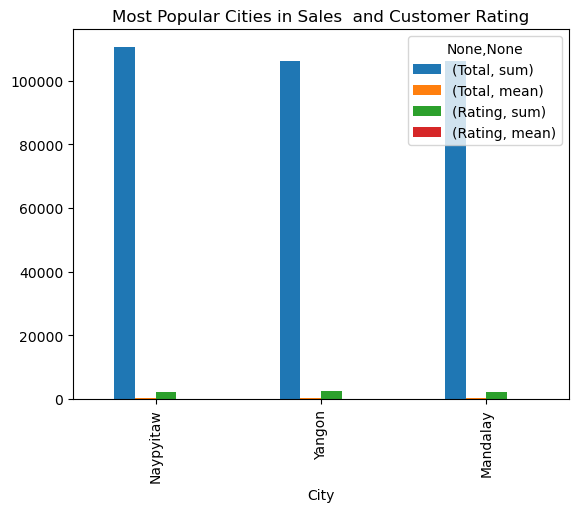

In [41]:
 # group the data by city and calculate total sales and average customer ratings for each city
city_data = df.groupby('City')['Total', 'Rating'].agg(['sum', 'mean'])

# sort the cities by total sales in decending order
city_data = city_data.sort_values(('Total', 'sum'), ascending=False)

# print the most popular cities for the supermarket in terms of sales and customer ratings
print("Most popular cities for the supermarket")
print(city_data)

#visualize the most popular cities for the supermarket in terms of sales and customer ratings
city_data.plot(kind='bar', title= 'Most Popular Cities in Sales  and Customer Rating')

### The characteristics of the most customers rating in term of gender, customer type, payment method, and product line

In [42]:
# group the data by gender, customer type, payment method, and product line and calculate the average customer rating for each group
customer_data = df.groupby(['Gender', 'Customer type', 'Payment', 'Product line'])['Rating'].mean()

# sort the group by average customer rating by descending order
customer_data = customer_data.sort_values(ascending=False)

# print the characteristics of the most customers rating in term of gender, customer type, payment method, and product line
print(customer_data.head(10))

Gender  Customer type  Payment      Product line          
Female  Member         Credit card  Electronic accessories    8.050000
Male    Normal         Credit card  Electronic accessories    7.925000
Female  Normal         Cash         Food and beverages        7.876923
Male    Member         Credit card  Electronic accessories    7.843750
                       Ewallet      Health and beauty         7.815385
Female  Normal         Cash         Health and beauty         7.738462
Male    Normal         Ewallet      Sports and travel         7.584211
Female  Member         Ewallet      Home and lifestyle        7.520000
                       Cash         Food and beverages        7.485000
        Normal         Cash         Fashion accessories       7.476471
Name: Rating, dtype: float64


<AxesSubplot:title={'center':'Top Group With The Hightest Average Customer Rating'}, xlabel='Gender,Customer type,Payment,Product line'>

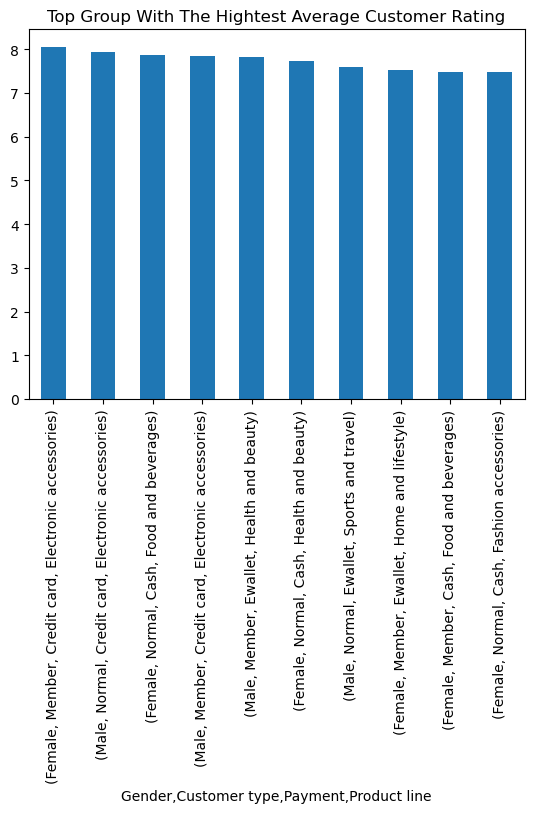

In [43]:
# visualize the characteristics of the most customers rating in term of gender, customer type, payment method, and product line
customer_data.head(10).plot(kind='bar', title='Top Group With The Hightest Average Customer Rating')

### To analyze and visualize total sales per month, transactions per week, transactions per day, and transactions per hour

Date
February     97219.374
March       109455.507
January     116291.868
Name: Total, dtype: float64


<AxesSubplot:title={'center':'Monthly Sales'}, xlabel='Date'>

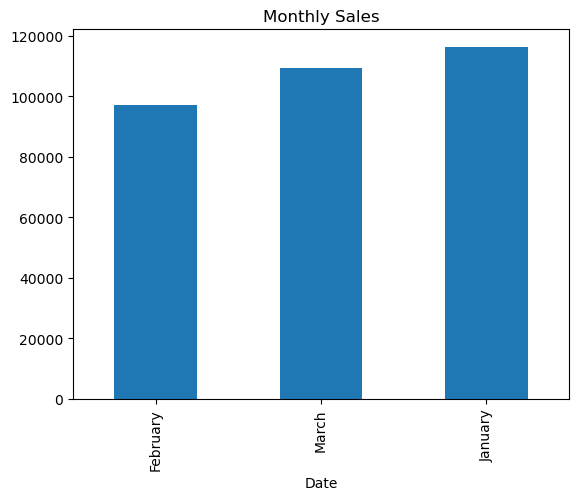

In [44]:
# calculate the total sales per month
df['Date'] = pd.to_datetime(df['Date'])

# group the data by date formatting the date as the full name of the month (%B) and calculate total sales for each months
monthly_sales = df.groupby(df['Date'].dt.strftime('%B'))['Total'].sum()

# sorting mobthly sales by ascending order
monthly_sales = monthly_sales.sort_values(ascending=True)

# print total sales per month
print(monthly_sales)

# visualize total sales per month
monthly_sales.plot(kind='bar', title='Monthly Sales')

Date
00    55
01    73
02    82
03    93
04    83
05    92
06    72
07    60
08    87
09    88
10    78
11    76
12    61
Name: Invoice ID, dtype: int64


<AxesSubplot:title={'center':'Transactions Per Week'}, xlabel='Date'>

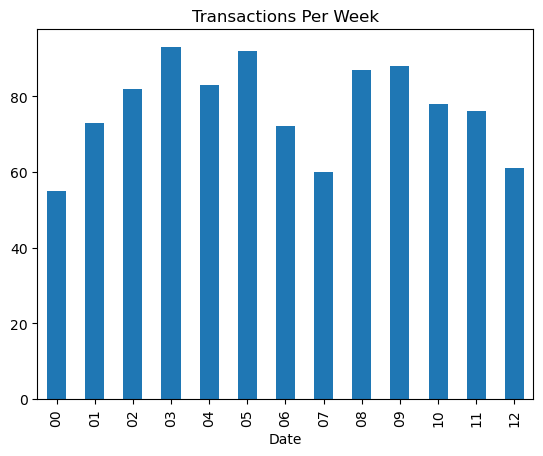

In [45]:
# calculate the total number of transactions per week
df['Date'] = pd.to_datetime(df['Date'])

# group the data by date formatting the date as the week start by monday (%W) and calculate the total number of transactions per week
transactions_per_week = df.groupby(df['Date'].dt.strftime('%W'))['Invoice ID'].nunique()

# print the total number of transactions per week
print(transactions_per_week)

# visualize the total number of transactions per week
transactions_per_week.plot(kind='bar', title='Transactions Per Week')

Date
Fri    139
Mon    125
Sat    164
Sun    133
Thu    138
Tue    158
Wed    143
Name: Total, dtype: int64


<AxesSubplot:title={'center':'Transactions Per Day'}, xlabel='Date'>

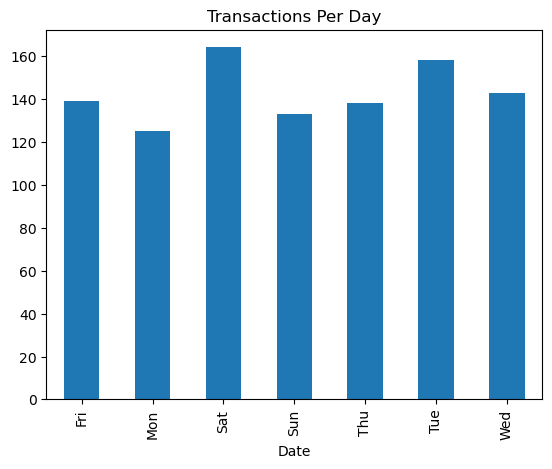

In [46]:
# calculate the total number of transactions per day
df['Date'] = pd.to_datetime(df['Date'])

# group the data by Date as the days(%a) and calculate the total transaction per day
transactions_per_day = df.groupby(df['Date'].dt.strftime('%a'))['Total'].nunique()

# print the total number of transactions per day
print(transactions_per_day)

# visualize the total number of transactions per day
transactions_per_day.plot(kind='bar', title='Transactions Per Day')

Time
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
Name: Invoice ID, dtype: int64


<AxesSubplot:title={'center':'Transactions Per Hour'}, xlabel='Time'>

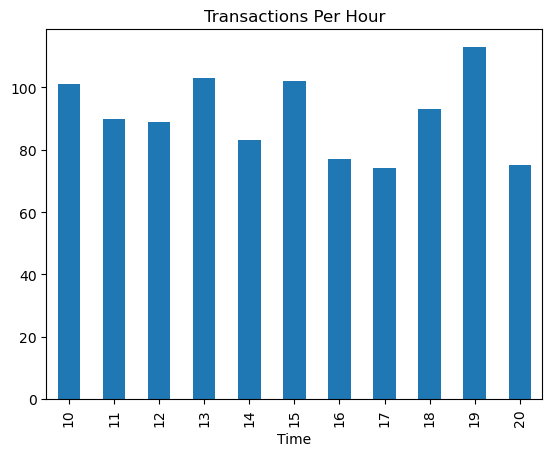

In [47]:
# calculate the total transactions per hour
df['Time'] = pd.to_datetime(df['Time'])

# group the data by time and formating as hours(%H) and calculate total transaction of hour
transactions_per_hour = df.groupby(df['Time'].dt.strftime('%H'))['Invoice ID'].nunique()

# print the transaction per hour
print(transactions_per_hour)

# visualize the transaction per hour
transactions_per_hour.plot(kind='bar', title='Transactions Per Hour')

### The most commonly purchased products on weekends, and how does this compare to weekday

In [48]:
# group the data by product line and date of the week and calculate total quantity sold for each group
product_data = df.groupby(['Product line', df['Date'].dt.strftime('%a')])['Quantity'].sum()

# select the group for weekend and weekday
weekend_data = product_data.loc[:, ['Sat', 'Sun']]
weekday_data = product_data.loc[:, ['Mon','Tue','Wed','Thu','Fri']]

# calculate the total quantity for each product line on weekend and weekday
weekend_data = weekend_data.groupby('Product line').sum()
weekday_data = weekday_data.groupby('Product line').sum()

# sort the data in decending order
weekend_data = weekend_data.sort_values(ascending=False)
weekday_data = weekday_data.sort_values(ascending=False)

Product line
Home and lifestyle        336
Sports and travel         309
Electronic accessories    293
Food and beverages        290
Fashion accessories       282
Health and beauty         187
Name: Quantity, dtype: int64


<AxesSubplot:title={'center':'Top Product Line On Weekend'}, xlabel='Product line'>

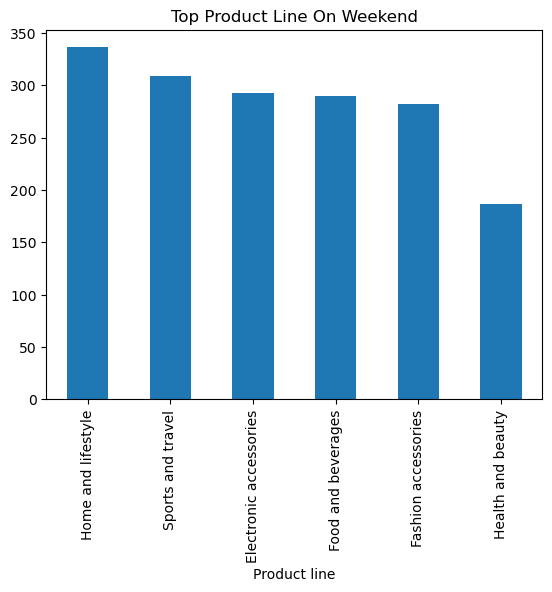

In [49]:
# print top product on weekend
print(weekend_data)

#visualize top product line on weekend
weekend_data.plot(kind='bar', title='Top Product Line On Weekend')

Product line
Electronic accessories    678
Health and beauty         667
Food and beverages        662
Fashion accessories       620
Sports and travel         611
Home and lifestyle        575
Name: Quantity, dtype: int64


<AxesSubplot:title={'center':'Top Product Line On Weekday'}, xlabel='Product line'>

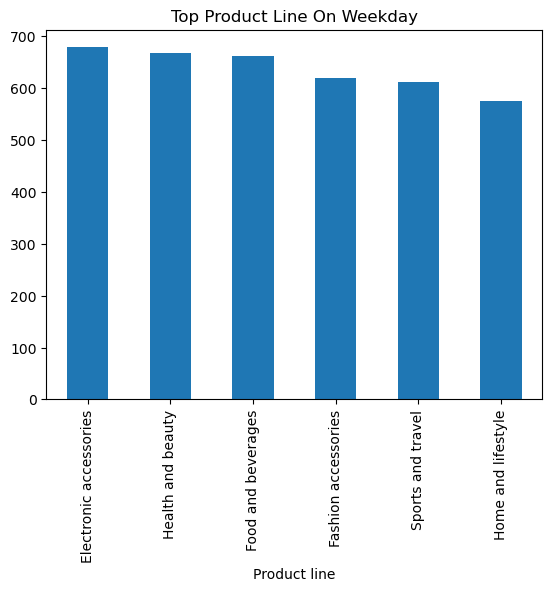

In [50]:
# print top product line on weekend
print(weekday_data)

# visualize top of the product line on weekend
weekday_data.plot(kind='bar', title='Top Product Line On Weekday')

### The relationship between date and time of transaction and the customes's gender, type ,and payment method

In [51]:
# group the data by gender, customer type, payment method, and date and time and calculate the total quantity sold for each group
transaction_data = df.groupby(['Gender', 'Customer type', 'Payment', 'Date', 'Time'])['Quantity'].sum()

#print the top 10 groups with the highest total quantity sold
print(transaction_data.sort_values(ascending=False))

Gender  Customer type  Payment      Date        Time               
Male    Normal         Ewallet      2019-03-29  2023-05-21 10:25:00    10
        Member         Credit card  2019-02-14  2023-05-21 11:26:00    10
Female  Member         Ewallet      2019-01-30  2023-05-21 20:23:00    10
                                    2019-02-10  2023-05-21 12:28:00    10
                                    2019-02-22  2023-05-21 12:30:00    10
                                                                       ..
Male    Normal         Cash         2019-03-16  2023-05-21 16:58:00     1
                       Ewallet      2019-01-14  2023-05-21 15:20:00     1
        Member         Cash         2019-02-12  2023-05-21 17:49:00     1
                                    2019-02-09  2023-05-21 13:22:00     1
Female  Normal         Credit card  2019-01-26  2023-05-21 10:06:00     1
Name: Quantity, Length: 1000, dtype: int64


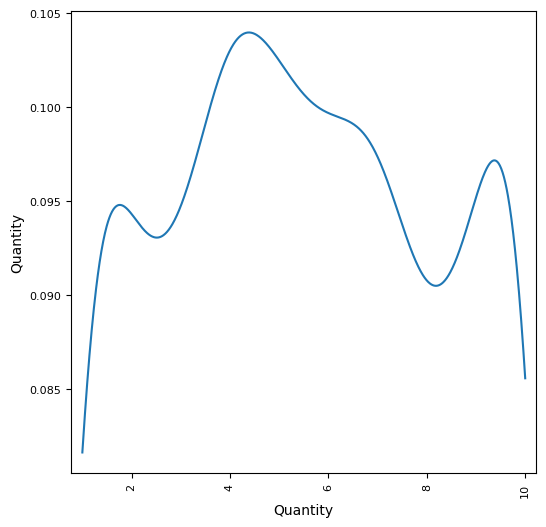

In [52]:
from pandas.plotting import scatter_matrix

transaction_data = transaction_data.to_frame()

#create a scatter matrix plot of the data
scatter_matrix(transaction_data, alpha=0.2, figsize=(6,6), diagonal='kde')

#show the plot
plt.show()

Overall, the scatter matrix plot is a compact and efficient way to visualize the relationships between multiple variables and to identify potential trends or patterns in the data. It can be particularly useful in exploratory data analysis, where you are trying to gain an understanding of the data and identify potential areas for further investigation.

### The relationship between the date and time of a transaction and the total amount spent

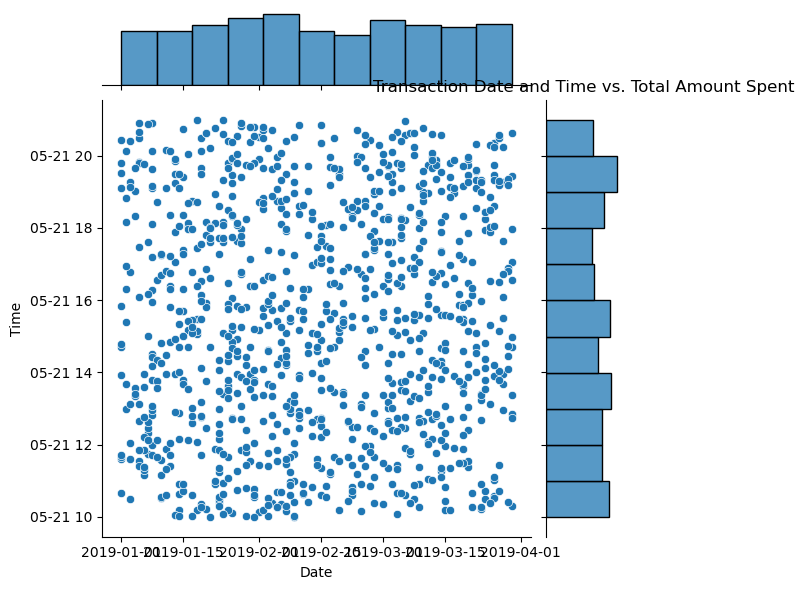

In [53]:
#create the joint plot
sns.jointplot(x='Date', y='Time', data=transaction_data, kind='scatter')

#add labels and title
plt.xlabel('Date')
plt.ylabel('Time')
plt.title('Transaction Date and Time vs. Total Amount Spent')

#show the plot
plt.show()

This jointplot can show the relationship between the date and time of a transaction and the total amount spent. This can be useful for identifying trends or patterns in customer spending habits over time.

The plot itself consists of two histograms - one for the date and one for the time - as well as a scatter plot showing the relationship between the two variables. The color of the points in the scatter plot indicates the value of the total amount spent, allowing you to see at a glance how the amount spent varies over time.

Overall, the jointplot provides a visual representation of the relationship between the date and time of a transaction and the total amount spent, allowing you to quickly identify trends and patterns in the data.

### Check the potential fraud or other unusual activity, such as multiple transactions with the same  invoice ID or outlier that high or low values.

In [54]:
# identify transactions with duplicate invoice ID for get the boolean mask indicating duplicated rows:
duplicate_invoice = df[df.duplicated(['Invoice ID'])]
print(duplicate_invoice[['Invoice ID', 'Branch', 'City', 'Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time', 'Payment']])

#calculate the z-score of each transaction
df['z_score'] = (df['Total']-df['Total'].mean())/df['Total'].std()

#identify transactions with a z-score greater than 3 or less than -3
outliner = df[(df['z_score']>3) | (df['z_score']<-3)]

#print the characteristics of transactions with unusually high or low values
print(outliner[['Invoice ID', 'Branch', 'City', 'Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time', 'Payment']])

Empty DataFrame
Columns: [Invoice ID, Branch, City, Product line, Unit price, Quantity, Total, Date, Time, Payment]
Index: []
Empty DataFrame
Columns: [Invoice ID, Branch, City, Product line, Unit price, Quantity, Total, Date, Time, Payment]
Index: []


Since we got two empty dataframes with no rows, it means that there were no transactions with duplicate invoice IDs or unusually high or low values in the dataset (outliers). This could be because the dataset is small (containing just 3 months worth of transactions) and doesn't contain any transactions with extremely high or low values, or it could be because the input data has already been cleaned and any outlier transactions have been removed